# Utilities

In [2]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import matplotlib as mpl
from scipy.integrate import odeint
from numpy import linalg as LA
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
mpl.rcdefaults() 
from scipy.stats import uniform
import scipy.stats as st
from matplotlib import colors
from matplotlib import cm
import pandas as pd
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy
import json
import xarray as xr
import pickle
from scipy.stats import linregress
from EWS_functions import *
from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d

jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
hfont = {'fontname':'Arial'}

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

## EWS functions

In [1]:
def get_EWS(time,data,trend,ws):
    linfits = []
    ps = []
    bound = ws // 2
    
    std = runstd(data - trend, ws)[bound:-bound]
    p0, p1 = np.polyfit(time[bound : -bound][:-2], std[:-2], 1)
    linfits.append([p0,p1])
    ps.append(kendall_tau_test(std[:-2], 1000, p0))
    
    ar1 = runac(data - trend, ws)[bound : -bound]
    p0, p1 = np.polyfit(time[bound : -bound][:-3], ar1[:-3], 1)
    linfits.append([p0,p1])
    ps.append(kendall_tau_test(ar1[:-2], 1000, p0))
    
    lam = run_fit_a_ar1(data-trend,ws)[bound:-bound]
    p0, p1 = np.polyfit(time[bound : -bound][:-2], lam[:-2], 1)
    linfits.append([p0,p1])
    ps.append(kendall_tau_test(lam[:-2], 1000, p0))
    
    return std, ar1, lam, linfits, ps

In [4]:
def plot_EWS(data, timess, ws=70, col='k',lbl='',alph=1,lw=1):
    bound = ws // 2
#     popt, cov = curve_fit(funcfit3, timess, data, p0 = [-8.33097773e-01,  1.05507897e-02,  2.02518923e+03], maxfev = 1000000000)
#     trend = funcfit3(timess, *popt)
    trend = gaussian_filter1d(data, 50)

    std, ar1, lam, linfits, ps = get_EWS(timess,data,trend,ws)

    ax1.plot(timess[bound : -bound],std,color=col,label=lbl,alpha=alph,lw=lw)
    pv = kendall_tau_test(std[:-2],1000,linfits[1][0])
    ax1.plot(timess[bound : -bound][:-2],linfits[0][0] * timess[bound : -bound][:-2] + linfits[0][1],linestyle='--',color=col,alpha=alph,lw=lw,label="p = {:.3f}".format(pv))

    ax2.plot(timess[bound : -bound],ar1,color=col,label=lbl,alpha=alph,lw=lw)
    pv = kendall_tau_test(ar1[:-2],1000,linfits[1][0])
    ax2.plot(timess[bound : -bound][:-2],linfits[1][0] * timess[bound : -bound][:-2] + linfits[1][1],linestyle='--',color=col,alpha=alph,lw=lw,label="p = {:.3f}".format(pv))

    ax3.plot(timess[bound : -bound],lam,color=col,label=lbl,alpha=alph,lw=lw)
    p0, p1, p2 = np.polyfit(timess[bound : -bound][:-2], lam[:-2], 2)
    pl0, pl1  = np.polyfit(timess[bound : -bound][:-2], lam[:-2], 1)
    pv = kendall_tau_test(lam[:-2], 1000, pl0) # precentile of 1000 fourier surrogates have a larger linear slope
#     ax3.plot(timess[bound : -bound][:-2], p0 * timess[bound : -bound][:-2]**2+p1 * timess[bound : -bound][:-2] + p2, color=col,linestyle='--',alpha=alph,lw=lw,label="p = {:.3f}".format(pv))
    ax3.plot(timess[bound : -bound][:-2], pl0 * timess[bound : -bound][:-2] + pl1, color=col,linestyle='--',alpha=alph,lw=lw,label="p = {:.3f}".format(pv))

# Make EWS files

In [5]:
def make_lambda_trend_array(lambdas,time,ws=70):
    bound = ws // 2
    tt = time[bound:-bound]
    lambda_trends = np.full((lambdas.shape[0],lambdas.shape[1]),np.nan)
    for i in np.arange(0,lambdas.shape[0]):
        for j in np.arange(0,lambdas.shape[1]):
            lam = np.nan_to_num(lambdas[i,j,:][bound : -bound].values)
            if lam.sum() != 0:
                p0, p1 = np.polyfit(tt[:-2], lam[:-2], 1)
                lambda_trends[i,j]=p0
    return lambda_trends

In [9]:
ds = xr.open_dataset('CMIP6_amoc.nc')

In [10]:
strn26 = ds.strength_265N
strn35 = ds.strength_35N
index = ds.index

# Fake AR1 amoc

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


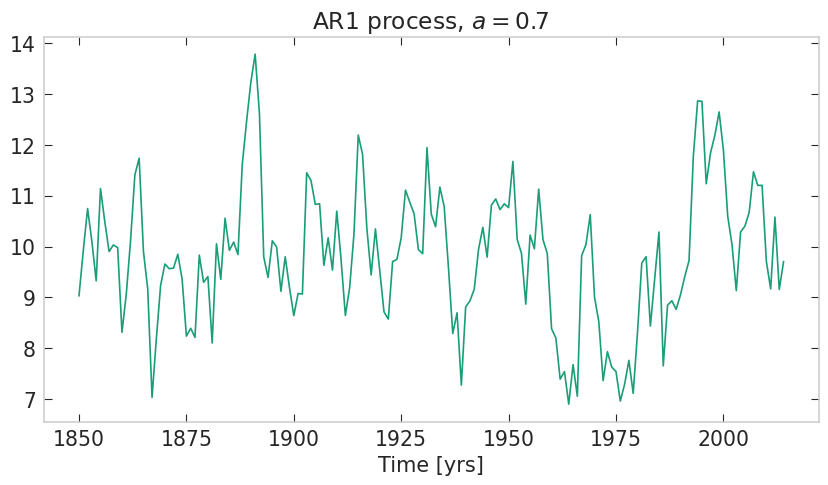

In [13]:
from statsmodels.tsa.arima_process import ArmaProcess
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(111)
mu = 10
ar1 = np.array([1, -0.7])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=len(index.year))+mu
plt.plot(index.year,simulated_data_1)
trend = gaussian_filter1d(simulated_data_1, 50)
# plt.plot(yrs,trend)
x = simulated_data_1 - mu
a_est = np.nansum(x[1:]*x[:-1])/np.nansum(x[1:]**2)

ax.set_title('AR1 process, $a=0.7$'.format(a_est))
ax.set_xlabel('Time [yrs]',fontsize=15)

plt.show()

In [14]:
ntime = len(index.year)
niter = 133
fakess = np.zeros((3,niter,ntime))
for i ,a in enumerate([0.5,0.7,0.9]):
    ar1 = np.array([1, -a])
    ma1 = np.array([1])
    AR_object1 = ArmaProcess(ar1, ma1)

    fakess[i,:] = AR_object1.generate_sample(nsample=[niter,ntime],axis=1)

In [15]:
yrs = index.year.values

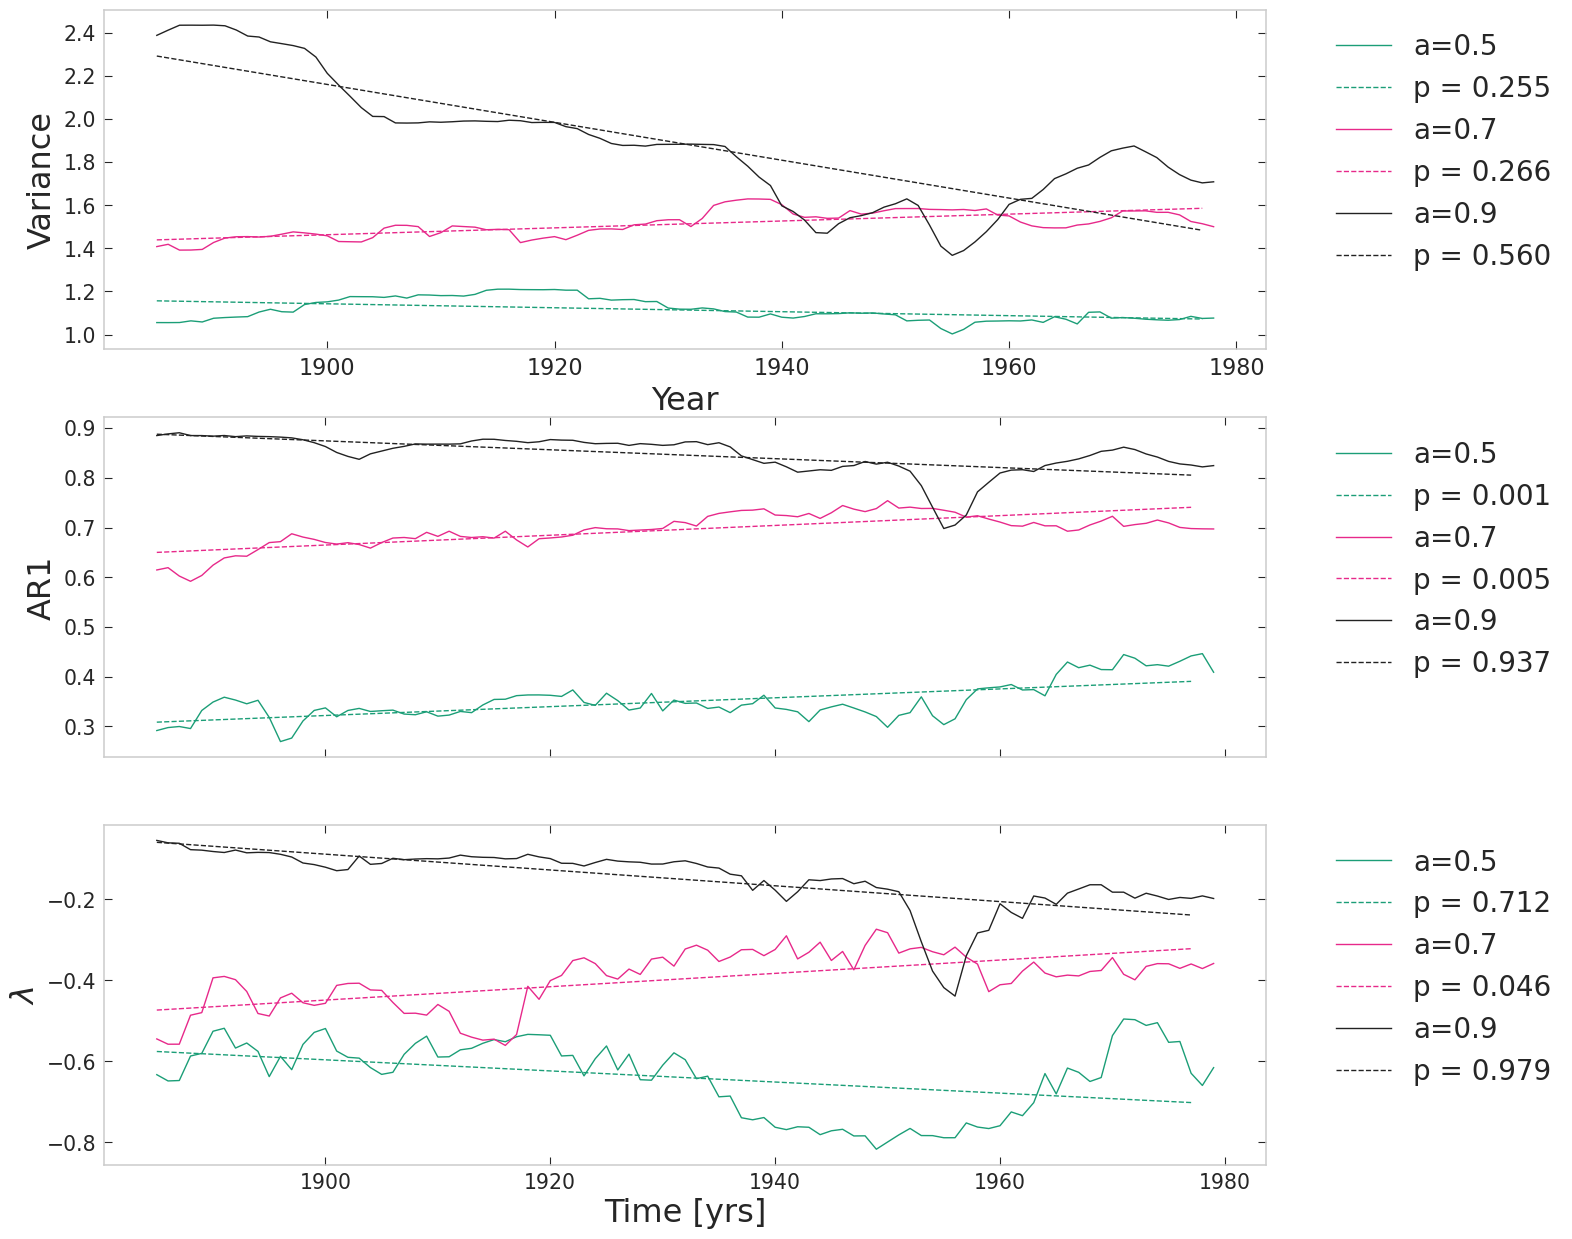

In [84]:
ws = 70
bound = ws // 2

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,15))

#### yearly
plot_EWS(fakess[0,0],yrs,ws=ws,col='C0',lbl='a=0.5')
plot_EWS(fakess[1,0],yrs,ws=ws,col='C3',lbl='a=0.7')
plot_EWS(fakess[2,0],yrs,ws=ws,col='k',lbl='a=0.9')


ax1.set_ylabel('Variance')
ax1.set_xlabel('Year')
ax1.legend(bbox_to_anchor=(1.05, 0.2), loc='lower left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False)
ax1.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=True, labelsize=fontsize)
ax2.set_ylabel('AR1')
ax2.legend(bbox_to_anchor=(1.05, 0.2), loc='lower left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False)
ax2.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=False, labelsize=fontsize)
ax3.set_ylabel('$\lambda$')
ax3.legend(bbox_to_anchor=(1.05, 0.2), loc='lower left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False)
ax3.set_xlabel('Time [yrs]')
plt.show()

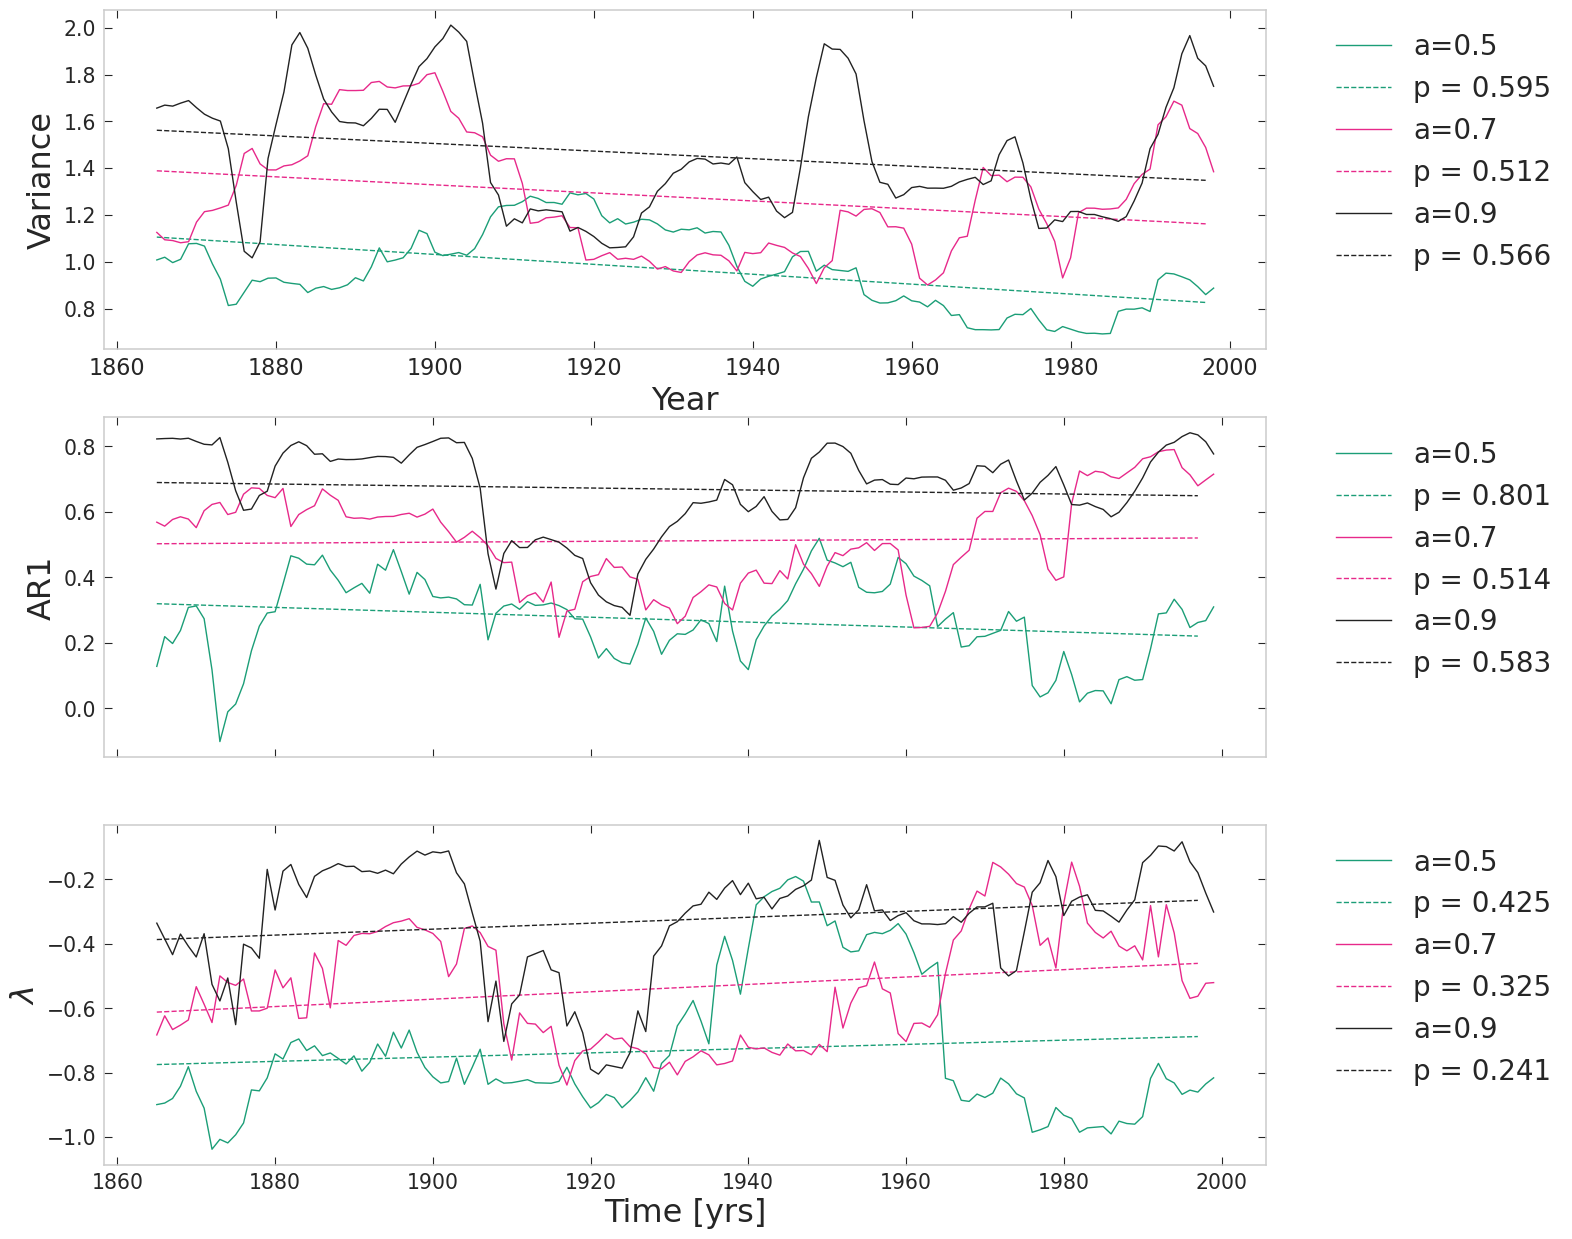

In [88]:
ws = 30
bound = ws // 2

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,15))

#### yearly
plot_EWS(fakess[0,10],yrs,ws=ws,col='C0',lbl='a=0.5')
plot_EWS(fakess[1,10],yrs,ws=ws,col='C3',lbl='a=0.7')
plot_EWS(fakess[2,10],yrs,ws=ws,col='k',lbl='a=0.9')


ax1.set_ylabel('Variance')
ax1.set_xlabel('Year')
ax1.legend(bbox_to_anchor=(1.05, 0.2), loc='lower left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False)
ax1.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=True, labelsize=fontsize)
ax2.set_ylabel('AR1')
ax2.legend(bbox_to_anchor=(1.05, 0.2), loc='lower left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False)
ax2.tick_params(axis='x', which='both',bottom=True,top=True,labelbottom=False, labelsize=fontsize)
ax3.set_ylabel('$\lambda$')
ax3.legend(bbox_to_anchor=(1.05, 0.2), loc='lower left', borderaxespad=0., fontsize=20,fancybox=False,frameon=False)
ax3.set_xlabel('Time [yrs]')
plt.show()

## lambda

In [44]:
def make_lambda_array(data,ws=70,gedge=5,gsigma=10):
    lambdas = np.full((data.shape[0],data.shape[1]-2*gedge),np.nan)
    for i in np.arange(0,data.shape[0]):
        amoc = np.nan_to_num(data[i])
        amoc_low = gaussian_filter1d(amoc, gsigma)
        if amoc.sum() != 0:
            lamb = run_fit_a_ar1((amoc-amoc_low)[gedge:-gedge],ws)
            lambdas[i,:]=lamb
    return lambdas

In [36]:
# gedge=5
# lamss = np.zeros((3,niter,ntime-2*gedge))
# for i in range(3):
#     data = fakess[i]
#     lamss[i] = make_lambda_array(data)

In [51]:
def make_pvs_array(lambdas,time,ws=70):
    bound = ws // 2
    tt = time[bound:-bound]
    lambda_pvs = np.full((lambdas.shape[0]),np.nan)
    for i in np.arange(0,lambdas.shape[0]):
        lam = np.nan_to_num(lambdas[i,:][bound : -bound])
        if lam.sum() != 0:
            p0, p1 = np.polyfit(tt[:-2], lam[:-2], 1)
            pv = kendall_tau_test(lam[:-2], 10000, p0)
            lambda_pvs[i]=pv
    return lambda_pvs

In [35]:
# pvs = np.zeros((3,niter))

# for i in range(3):
#     data = lamss[i]
#     pvs[i] = make_pvs_array(data,yrs[gedge:-gedge])

In [49]:
lambdas = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss),
                     pvs=(['a','iters'],pvs)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 70 yrs')
)
lambdas.to_netcdf('EWS_files/null_lambdas.nc')

In [66]:
lamss = xr.open_dataset('EWS_files/null_lambdas.nc').lambdas

In [71]:
tau = np.zeros((3,niter))

for i in range(3):
    data = lamss[i]
    tau[i] = make_kendall_array(data,yrs[gedge:-gedge])
    
lambdas_tau = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss.values),
                    taus = (['a','iters'],tau)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 30 yrs')
)


In [50]:
min_pv = 0.05

EWS_all = lambdas.pvs.where(
           ((lambdas.pvs.sel(a=0.5)<=min_pv)&
            (lambdas.pvs.sel(a=0.7)<=min_pv)&
            (lambdas.pvs.sel(a=0.9)<=min_pv)))
EWS1 = lambdas.pvs.where(
           (lambdas.pvs.sel(a=0.5)<=min_pv))
EWS2 = lambdas.pvs.where(
           (lambdas.pvs.sel(a=0.7)<=min_pv))
EWS3 = lambdas.pvs.where(
           (lambdas.pvs.sel(a=0.9)<=min_pv))

EWS_any = lambdas.pvs.where(
           ((lambdas.pvs.sel(a=0.5)<=min_pv) |
            (lambdas.pvs.sel(a=0.7)<=min_pv) |
            (lambdas.pvs.sel(a=0.9)<=min_pv)))
EWS12 = lambdas.pvs.where(
           (lambdas.pvs.sel(a=0.5)<=min_pv)&
            (lambdas.pvs.sel(a=0.7)<=min_pv))
EWS23 = lambdas.pvs.where(
           (lambdas.pvs.sel(a=0.7)<=min_pv)&
            (lambdas.pvs.sel(a=0.9)<=min_pv))
EWS13 = lambdas.pvs.where(
           (lambdas.pvs.sel(a=0.5)<=min_pv)&
            (lambdas.pvs.sel(a=0.9)<=min_pv))

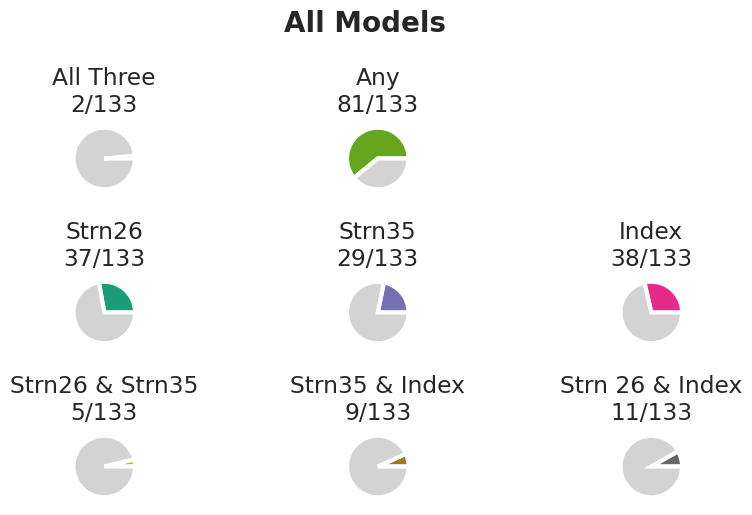

In [51]:
N_tot = np.count_nonzero(~np.isnan(lambdas.pvs.sel(a=0.5).values))
N_all = np.count_nonzero(~np.isnan(EWS_all.sel(a=0.5).values))
N_s26 = np.count_nonzero(~np.isnan(EWS1.sel(a=0.5).values))
N_s35 = np.count_nonzero(~np.isnan(EWS2.sel(a=0.5).values))
N_indx = np.count_nonzero(~np.isnan(EWS3.sel(a=0.5).values))
N_any = np.count_nonzero(~np.isnan(EWS_any.sel(a=0.5).values))
N_strns = np.count_nonzero(~np.isnan(EWS12.sel(a=0.5).values))
N_strn35indx = np.count_nonzero(~np.isnan(EWS23.sel(a=0.5).values))
N_strn26indx = np.count_nonzero(~np.isnan(EWS13.sel(a=0.5).values))

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(3, 3)
ax = fig.add_subplot(gs[0,0])
data = [N_all,N_tot-N_all]
patches, texts= ax.pie(
data,
    colors = ['C1','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('All Three\n{}/{}'.format(N_all,N_tot))

ax = fig.add_subplot(gs[0,1])
data = [N_any,N_tot-N_any]
patches, texts= ax.pie(
data,
    colors = ['C4','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Any\n{}/{}'.format(N_any,N_tot))

ax = fig.add_subplot(gs[1,0])
data = [N_s26,N_tot-N_s26]
patches, texts= ax.pie(
data,
colors = ['C0','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26\n{}/{}'.format(N_s26,N_tot))

ax = fig.add_subplot(gs[1,1])
data = [N_s35,N_tot-N_s35]
patches, texts= ax.pie(
data,
    colors = ['C2','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35\n{}/{}'.format(N_s35,N_tot))

ax = fig.add_subplot(gs[1,2])
data = [N_indx,N_tot-N_indx]
patches, texts= ax.pie(
data,
    colors = ['C3','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Index\n{}/{}'.format(N_indx,N_tot))



ax = fig.add_subplot(gs[2,0])
data = [N_strns,N_tot-N_strns]
patches, texts= ax.pie(
data,
colors = ['C5','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26 & Strn35\n{}/{}'.format(N_strns,N_tot))

ax = fig.add_subplot(gs[2,1])
data = [N_strn35indx,N_tot-N_strn35indx]
patches, texts= ax.pie(
data,
    colors = ['C6','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35 & Index\n{}/{}'.format(N_strn35indx,N_tot))

ax = fig.add_subplot(gs[2,2])
data = [N_strn26indx,N_tot-N_strn26indx]
patches, texts= ax.pie(
data,
    colors = ['C7','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn 26 & Index\n{}/{}'.format(N_strn26indx,N_tot))


fig.subplots_adjust(hspace=1)
fig.suptitle('All Models',fontsize=20,fontweight='bold',y=1.1)
plt.show()

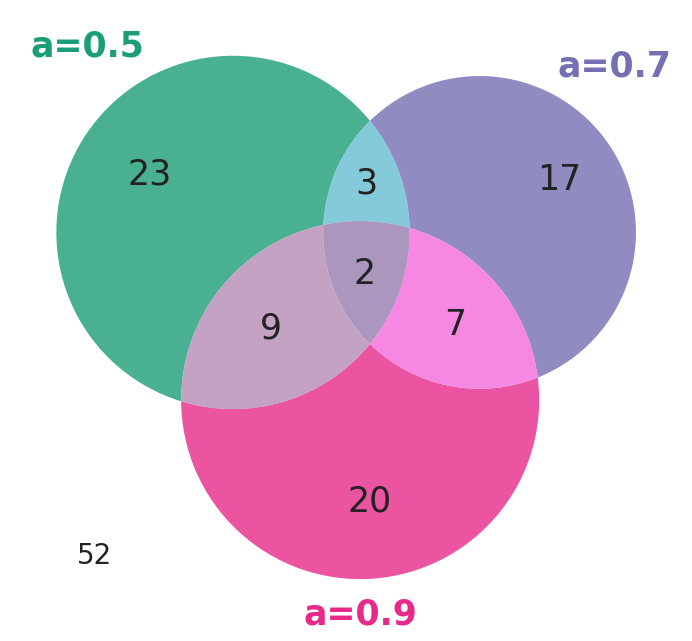

In [52]:
from matplotlib_venn import venn3, venn3_circles
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
subsets = (23, 17, 3, 20, 9, 7, 2)
cols = ['C0','C2','C3']
out = venn3(subsets = subsets, set_labels = ('a=0.5', 'a=0.7', 'a=0.9'), alpha = 0.8,set_colors=['C0','C2','C3'])
# venn3_circles(subsets = subsets)
for i, text in enumerate(out.set_labels):
    text.set_fontsize(25)
    text.set_fontweight('bold')
    text.set_color(cols[i])
for text in out.subset_labels:
    text.set_fontsize(25)
    text.set_color('k')
ax.text(0.1,0.1,52,transform=ax.transAxes,ma='left',color='k',fontsize=20)
fig.patch.set_facecolor("white")
plt.show()

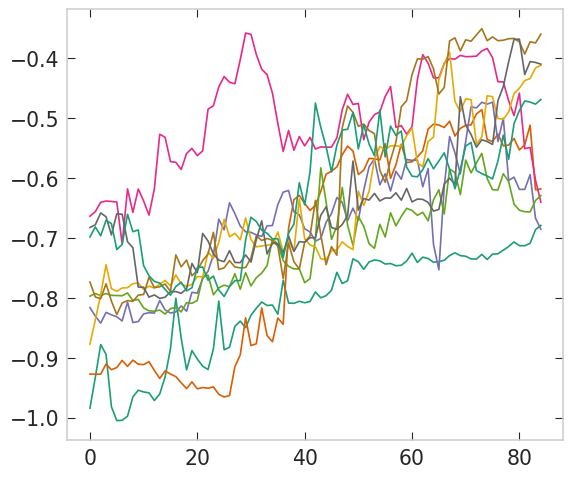

In [59]:
po

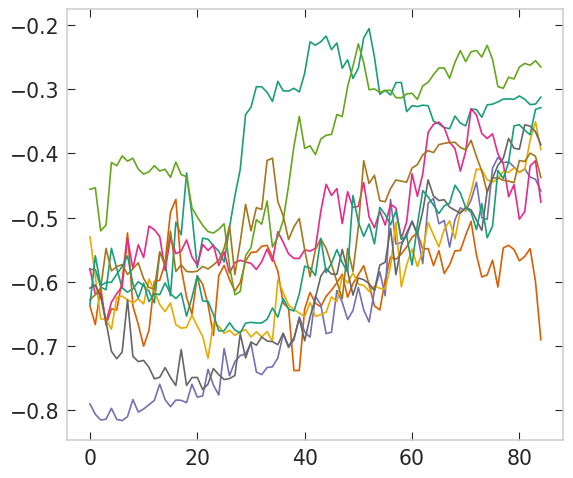

In [57]:
bound = 35
data = lambdas.lambdas.where((lambdas.pvs.sel(a=0.7)<=min_pv)).sel(a=0.7)
for i in np.arange(0,30):
        lam = np.nan_to_num(data[i,:][bound : -bound])
        if lam.sum() != 0:
            plt.plot(lam)

# other version

In [74]:
def run_fit_a_ar1_GLS(x, w):
    n = x.shape[0]
    xs = np.zeros_like(x)

    for i in range(w // 2):
        xs[i] = np.nan

    for i in range(n - w // 2, n):
        xs[i] = np.nan

    for i in range(w // 2, n - w // 2):
        xw = x[i - w // 2 : i + w // 2 + 1]
        xw = xw - xw.mean() # variations in the window

        p0, p1 = np.polyfit(np.arange(xw.shape[0]), xw, 1)

        xw = xw - p0 * np.arange(xw.shape[0]) - p1 # remove linear trend


        dxw = xw[1:] - xw[:-1] # each element is x[i+1]-x[i] (same as np.diff(xw))

        xw = sm.add_constant(xw)
        model = sm.GLS(dxw, xw[:-1])
        results = model.fit()

        a = results.params[1]

        xs[i] = a
    return xs

In [75]:
def make_lambda_array_GLS(data,ws=70,gedge=5,gsigma=10):
    lambdas = np.full((data.shape[0],data.shape[1]-2*gedge),np.nan)
    for i in np.arange(0,data.shape[0]):
        amoc = np.nan_to_num(data[i])
        amoc_low = gaussian_filter1d(amoc, gsigma)
        if amoc.sum() != 0:
            lamb = run_fit_a_ar1_GLS((amoc-amoc_low)[gedge:-gedge],ws)
            lambdas[i,:]=lamb
    return lambdas

In [76]:
gedge=5
lamss2 = np.zeros((3,niter,ntime-2*gedge))
for i in range(3):
    data = fakess[i]
    lamss2[i] = make_lambda_array_GLS(data)

In [77]:
pvs2 = np.zeros((3,niter))

for i in range(3):
    data = lamss2[i]
    pvs2[i] = make_pvs_array(data,yrs[gedge:-gedge])

In [78]:
lambdas2 = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss2),
                     pvs=(['a','iters'],pvs2)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 70 yrs')
)
lambdas.to_netcdf('EWS_files/null_lambdas2.nc')

In [79]:
min_pv = 0.05

EWS_all = lambdas2.pvs.where(
           ((lambdas2.pvs.sel(a=0.5)<=min_pv)&
            (lambdas2.pvs.sel(a=0.7)<=min_pv)&
            (lambdas2.pvs.sel(a=0.9)<=min_pv)))
EWS1 = lambdas2.pvs.where(
           (lambdas2.pvs.sel(a=0.5)<=min_pv))
EWS2 = lambdas2.pvs.where(
           (lambdas2.pvs.sel(a=0.7)<=min_pv))
EWS3 = lambdas2.pvs.where(
           (lambdas2.pvs.sel(a=0.9)<=min_pv))

EWS_any = lambdas2.pvs.where(
           ((lambdas2.pvs.sel(a=0.5)<=min_pv) |
            (lambdas2.pvs.sel(a=0.7)<=min_pv) |
            (lambdas2.pvs.sel(a=0.9)<=min_pv)))
EWS12 = lambdas2.pvs.where(
           (lambdas2.pvs.sel(a=0.5)<=min_pv)&
            (lambdas2.pvs.sel(a=0.7)<=min_pv))
EWS23 = lambdas2.pvs.where(
           (lambdas2.pvs.sel(a=0.7)<=min_pv)&
            (lambdas2.pvs.sel(a=0.9)<=min_pv))
EWS13 = lambdas2.pvs.where(
           (lambdas2.pvs.sel(a=0.5)<=min_pv)&
            (lambdas2.pvs.sel(a=0.9)<=min_pv))

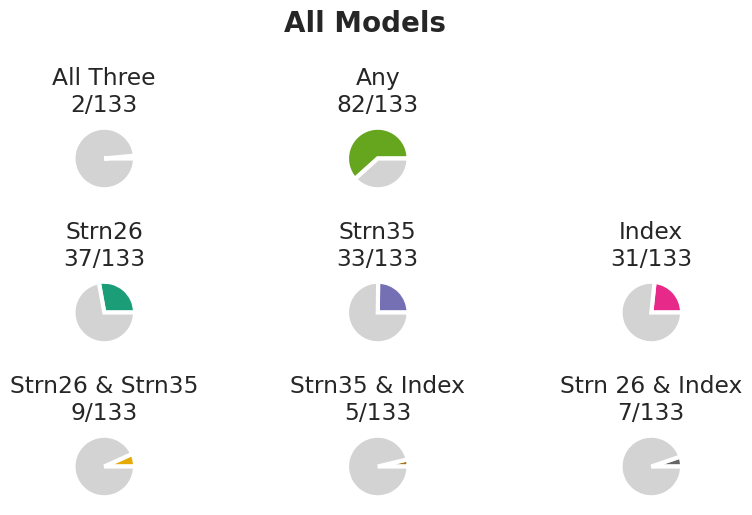

In [80]:
N_tot = np.count_nonzero(~np.isnan(lambdas2.pvs.sel(a=0.5).values))
N_all = np.count_nonzero(~np.isnan(EWS_all.sel(a=0.5).values))
N_s26 = np.count_nonzero(~np.isnan(EWS1.sel(a=0.5).values))
N_s35 = np.count_nonzero(~np.isnan(EWS2.sel(a=0.5).values))
N_indx = np.count_nonzero(~np.isnan(EWS3.sel(a=0.5).values))
N_any = np.count_nonzero(~np.isnan(EWS_any.sel(a=0.5).values))
N_strns = np.count_nonzero(~np.isnan(EWS12.sel(a=0.5).values))
N_strn35indx = np.count_nonzero(~np.isnan(EWS23.sel(a=0.5).values))
N_strn26indx = np.count_nonzero(~np.isnan(EWS13.sel(a=0.5).values))

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(3, 3)
ax = fig.add_subplot(gs[0,0])
data = [N_all,N_tot-N_all]
patches, texts= ax.pie(
data,
    colors = ['C1','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('All Three\n{}/{}'.format(N_all,N_tot))

ax = fig.add_subplot(gs[0,1])
data = [N_any,N_tot-N_any]
patches, texts= ax.pie(
data,
    colors = ['C4','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Any\n{}/{}'.format(N_any,N_tot))

ax = fig.add_subplot(gs[1,0])
data = [N_s26,N_tot-N_s26]
patches, texts= ax.pie(
data,
colors = ['C0','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26\n{}/{}'.format(N_s26,N_tot))

ax = fig.add_subplot(gs[1,1])
data = [N_s35,N_tot-N_s35]
patches, texts= ax.pie(
data,
    colors = ['C2','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35\n{}/{}'.format(N_s35,N_tot))

ax = fig.add_subplot(gs[1,2])
data = [N_indx,N_tot-N_indx]
patches, texts= ax.pie(
data,
    colors = ['C3','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Index\n{}/{}'.format(N_indx,N_tot))



ax = fig.add_subplot(gs[2,0])
data = [N_strns,N_tot-N_strns]
patches, texts= ax.pie(
data,
colors = ['C5','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26 & Strn35\n{}/{}'.format(N_strns,N_tot))

ax = fig.add_subplot(gs[2,1])
data = [N_strn35indx,N_tot-N_strn35indx]
patches, texts= ax.pie(
data,
    colors = ['C6','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35 & Index\n{}/{}'.format(N_strn35indx,N_tot))

ax = fig.add_subplot(gs[2,2])
data = [N_strn26indx,N_tot-N_strn26indx]
patches, texts= ax.pie(
data,
    colors = ['C7','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn 26 & Index\n{}/{}'.format(N_strn26indx,N_tot))


fig.subplots_adjust(hspace=1)
fig.suptitle('All Models',fontsize=20,fontweight='bold',y=1.1)
plt.show()

# window size change

In [46]:
gedge=5
lamss3 = np.zeros((3,niter,ntime-2*gedge))
for i in range(3):
    data = fakess[i]
    lamss3[i] = make_lambda_array(data, ws = 30)

In [52]:
pvs3 = np.zeros((3,niter))

for i in range(3):
    data = lamss3[i]
    pvs3[i] = make_pvs_array(data,yrs[gedge:-gedge],ws=30)

In [53]:
lambdas3 = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss3),
                     pvs=(['a','iters'],pvs3)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 30 yrs')
)
lambdas3.to_netcdf('EWS_files/null_lambdas3.nc')

In [57]:
tau3 = np.zeros((3,niter))

for i in range(3):
    data = lamss3[i]
    tau3[i] = make_kendall_array(data,yrs[gedge:-gedge])
    
lambdas3_tau = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss3),
                     pvs=(['a','iters'],pvs3),
                    taus = (['a','iters'],tau3)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 30 yrs')
)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


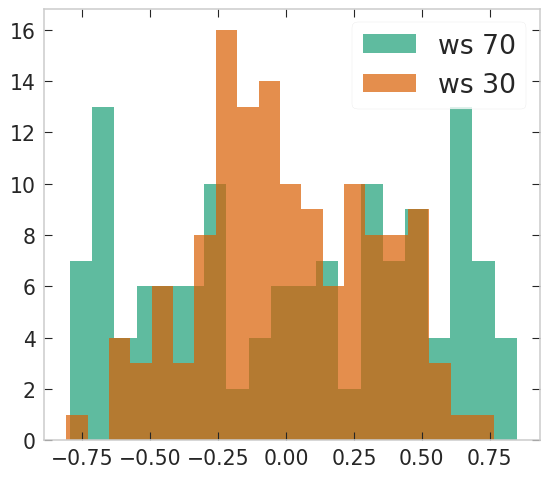

In [77]:
plt.hist(lambdas_tau.sel(a=0.5).taus,bins=20,alpha=0.7,label='ws 70')
plt.hist(lambdas3_tau.sel(a=0.5).taus,bins=20,alpha=0.7,label='ws 30')
plt.legend()
plt.show()

In [54]:
min_pv = 0.05

EWS_all = lambdas3.pvs.where(
           ((lambdas3.pvs.sel(a=0.5)<=min_pv)&
            (lambdas3.pvs.sel(a=0.7)<=min_pv)&
            (lambdas3.pvs.sel(a=0.9)<=min_pv)))
EWS1 = lambdas3.pvs.where(
           (lambdas3.pvs.sel(a=0.5)<=min_pv))
EWS2 = lambdas3.pvs.where(
           (lambdas3.pvs.sel(a=0.7)<=min_pv))
EWS3 = lambdas3.pvs.where(
           (lambdas3.pvs.sel(a=0.9)<=min_pv))

EWS_any = lambdas3.pvs.where(
           ((lambdas3.pvs.sel(a=0.5)<=min_pv) |
            (lambdas3.pvs.sel(a=0.7)<=min_pv) |
            (lambdas3.pvs.sel(a=0.9)<=min_pv)))
EWS12 = lambdas3.pvs.where(
           (lambdas3.pvs.sel(a=0.5)<=min_pv)&
            (lambdas3.pvs.sel(a=0.7)<=min_pv))
EWS23 = lambdas3.pvs.where(
           (lambdas3.pvs.sel(a=0.7)<=min_pv)&
            (lambdas3.pvs.sel(a=0.9)<=min_pv))
EWS13 = lambdas3.pvs.where(
           (lambdas3.pvs.sel(a=0.5)<=min_pv)&
            (lambdas3.pvs.sel(a=0.9)<=min_pv))

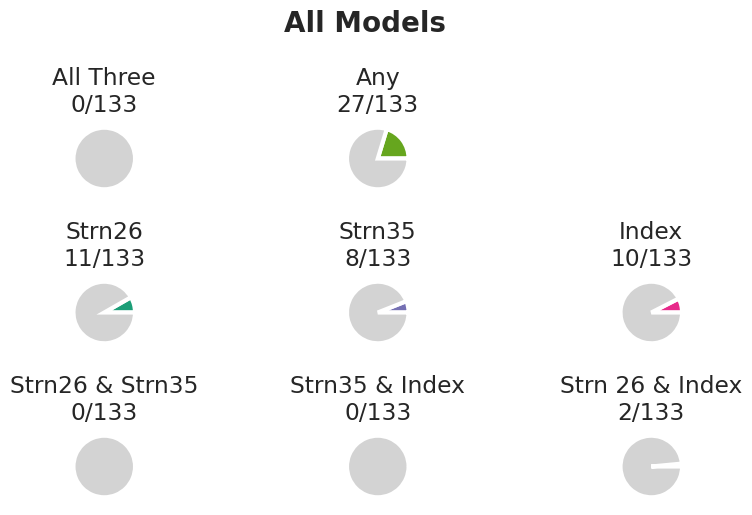

In [55]:
N_tot = np.count_nonzero(~np.isnan(lambdas3.pvs.sel(a=0.5).values))
N_all = np.count_nonzero(~np.isnan(EWS_all.sel(a=0.5).values))
N_s26 = np.count_nonzero(~np.isnan(EWS1.sel(a=0.5).values))
N_s35 = np.count_nonzero(~np.isnan(EWS2.sel(a=0.5).values))
N_indx = np.count_nonzero(~np.isnan(EWS3.sel(a=0.5).values))
N_any = np.count_nonzero(~np.isnan(EWS_any.sel(a=0.5).values))
N_strns = np.count_nonzero(~np.isnan(EWS12.sel(a=0.5).values))
N_strn35indx = np.count_nonzero(~np.isnan(EWS23.sel(a=0.5).values))
N_strn26indx = np.count_nonzero(~np.isnan(EWS13.sel(a=0.5).values))

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(3, 3)
ax = fig.add_subplot(gs[0,0])
data = [N_all,N_tot-N_all]
patches, texts= ax.pie(
data,
    colors = ['C1','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('All Three\n{}/{}'.format(N_all,N_tot))

ax = fig.add_subplot(gs[0,1])
data = [N_any,N_tot-N_any]
patches, texts= ax.pie(
data,
    colors = ['C4','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Any\n{}/{}'.format(N_any,N_tot))

ax = fig.add_subplot(gs[1,0])
data = [N_s26,N_tot-N_s26]
patches, texts= ax.pie(
data,
colors = ['C0','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26\n{}/{}'.format(N_s26,N_tot))

ax = fig.add_subplot(gs[1,1])
data = [N_s35,N_tot-N_s35]
patches, texts= ax.pie(
data,
    colors = ['C2','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35\n{}/{}'.format(N_s35,N_tot))

ax = fig.add_subplot(gs[1,2])
data = [N_indx,N_tot-N_indx]
patches, texts= ax.pie(
data,
    colors = ['C3','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Index\n{}/{}'.format(N_indx,N_tot))



ax = fig.add_subplot(gs[2,0])
data = [N_strns,N_tot-N_strns]
patches, texts= ax.pie(
data,
colors = ['C5','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26 & Strn35\n{}/{}'.format(N_strns,N_tot))

ax = fig.add_subplot(gs[2,1])
data = [N_strn35indx,N_tot-N_strn35indx]
patches, texts= ax.pie(
data,
    colors = ['C6','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35 & Index\n{}/{}'.format(N_strn35indx,N_tot))

ax = fig.add_subplot(gs[2,2])
data = [N_strn26indx,N_tot-N_strn26indx]
patches, texts= ax.pie(
data,
    colors = ['C7','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn 26 & Index\n{}/{}'.format(N_strn26indx,N_tot))


fig.subplots_adjust(hspace=1)
fig.suptitle('All Models',fontsize=20,fontweight='bold',y=1.1)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


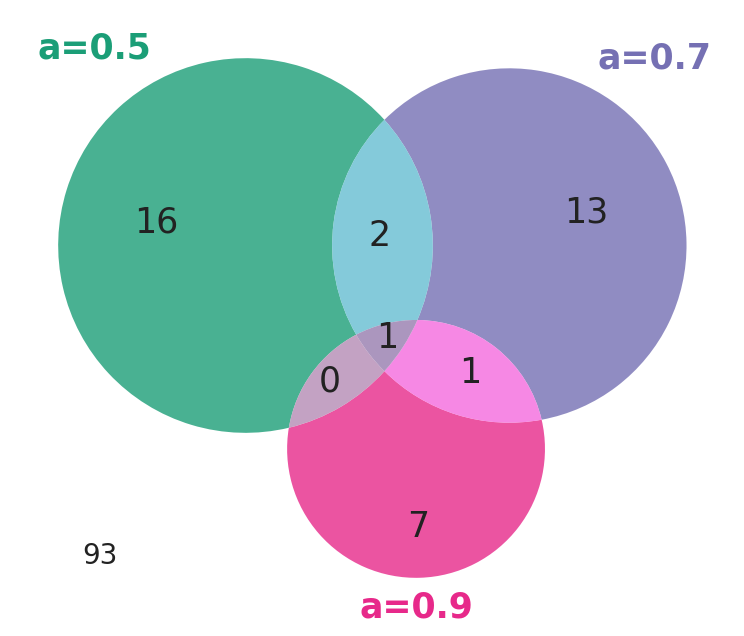

In [56]:
from matplotlib_venn import venn3, venn3_circles
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
subsets = (16, 13, 2, 7, 0, 1, 1)
cols = ['C0','C2','C3']
out = venn3(subsets = subsets, set_labels = ('a=0.5', 'a=0.7', 'a=0.9'), alpha = 0.8,set_colors=['C0','C2','C3'])
# venn3_circles(subsets = subsets)
for i, text in enumerate(out.set_labels):
    text.set_fontsize(25)
    text.set_fontweight('bold')
    text.set_color(cols[i])
for text in out.subset_labels:
    text.set_fontsize(25)
    text.set_color('k')
ax.text(0.1,0.1,93,transform=ax.transAxes,ma='left',color='k',fontsize=20)
fig.patch.set_facecolor("white")
plt.show()

# new lambda functions

In [5]:
def runlam(x, w):
    n = x.shape[0]
    xs = np.zeros_like(x)
    xs[: w//2] = np.nan
    xs[n-w//2:] = np.nan

    for i in range(w // 2, n - w // 2):
        xw = x[i - w // 2 : i + w // 2 + 1]
        xw = xw - xw.mean()
        lg = st.linregress(np.arange(xw.shape[0]), xw)[:]
        p0 = lg[0]
        p1 = lg[1]
        xw = xw - p0 * np.arange(xw.shape[0]) - p1

        dxw = xw[1:] - xw[:-1]
         # a, b = np.polyfit(xw[:-1], dxw, 1)
        lg = st.linregress(xw[:-1], dxw)[:]
        a = lg[0]
        b = lg[1]

        xs[i] = np.log(a + 1)
    return xs

In [6]:
def make_lambda_array_new(data,ws=70,gedge=5,gsigma=10):
    lambdas = np.full((data.shape[0],data.shape[1]-2*gedge),np.nan)
    for i in np.arange(0,data.shape[0]):
        amoc = np.nan_to_num(data[i])
        amoc_low = gaussian_filter1d(amoc, gsigma)
        if amoc.sum() != 0:
            lamb = runlam((amoc-amoc_low)[gedge:-gedge],ws)
            lambdas[i,:]=lamb
    return lambdas

In [29]:
gedge=5
lamss4 = np.zeros((3,niter,ntime-2*gedge))
for i in range(3):
    data = fakess[i]
    lamss4[i] = make_lambda_array_new(data, ws = 70)

In [33]:
pvs4 = np.zeros((3,niter))

for i in range(3):
    data = lamss4[i]
    pvs4[i] = make_pvs_array(data,yrs[gedge:-gedge])

In [20]:
import scipy.stats as st
def make_kendall_array(lambdas,time,ws=70):
    bound = ws // 2
    tt = time[bound:-bound]
    lambda_pvs = np.full((lambdas.shape[0]),np.nan)
    for i in np.arange(0,lambdas.shape[0]):
        lam = np.nan_to_num(lambdas[i,:][bound : -bound])
        if lam.sum() != 0:
            tau = st.kendalltau(tt,lam)
            lambda_pvs[i]=tau[0]
    return lambda_pvs

In [21]:
tau4 = np.zeros((3,niter))

for i in range(3):
    data = lamss4[i]
    tau4[i] = make_kendall_array(data,yrs[gedge:-gedge])

In [39]:
lambdas4 = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss4),
                     pvs=(['a','iters'],pvs4),
                    taus = (['a','iters'],tau4)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 30 yrs')
)
# lambdas3.to_netcdf('EWS_files/null_lambdas3.nc')

In [36]:
min_pv = 0.05

EWS_all = lambdas4.pvs.where(
           ((lambdas4.pvs.sel(a=0.5)<=min_pv)&
            (lambdas4.pvs.sel(a=0.7)<=min_pv)&
            (lambdas4.pvs.sel(a=0.9)<=min_pv)))
EWS1 = lambdas4.pvs.where(
           (lambdas4.pvs.sel(a=0.5)<=min_pv))
EWS2 = lambdas4.pvs.where(
           (lambdas4.pvs.sel(a=0.7)<=min_pv))
EWS3 = lambdas4.pvs.where(
           (lambdas4.pvs.sel(a=0.9)<=min_pv))

EWS_any = lambdas4.pvs.where(
           ((lambdas4.pvs.sel(a=0.5)<=min_pv) |
            (lambdas4.pvs.sel(a=0.7)<=min_pv) |
            (lambdas4.pvs.sel(a=0.9)<=min_pv)))
EWS12 = lambdas4.pvs.where(
           (lambdas4.pvs.sel(a=0.5)<=min_pv)&
            (lambdas4.pvs.sel(a=0.7)<=min_pv))
EWS23 = lambdas4.pvs.where(
           (lambdas4.pvs.sel(a=0.7)<=min_pv)&
            (lambdas4.pvs.sel(a=0.9)<=min_pv))
EWS13 = lambdas4.pvs.where(
           (lambdas4.pvs.sel(a=0.5)<=min_pv)&
            (lambdas4.pvs.sel(a=0.9)<=min_pv))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


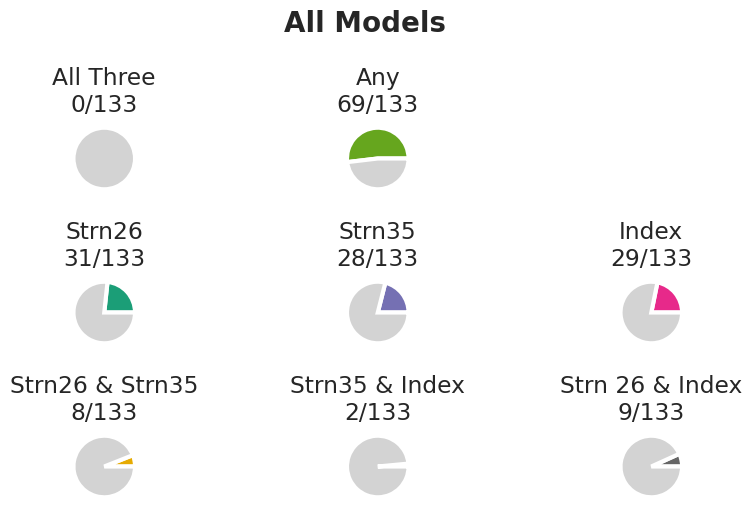

In [38]:
N_tot = np.count_nonzero(~np.isnan(lambdas4.pvs.sel(a=0.5).values))
N_all = np.count_nonzero(~np.isnan(EWS_all.sel(a=0.5).values))
N_s26 = np.count_nonzero(~np.isnan(EWS1.sel(a=0.5).values))
N_s35 = np.count_nonzero(~np.isnan(EWS2.sel(a=0.5).values))
N_indx = np.count_nonzero(~np.isnan(EWS3.sel(a=0.5).values))
N_any = np.count_nonzero(~np.isnan(EWS_any.sel(a=0.5).values))
N_strns = np.count_nonzero(~np.isnan(EWS12.sel(a=0.5).values))
N_strn35indx = np.count_nonzero(~np.isnan(EWS23.sel(a=0.5).values))
N_strn26indx = np.count_nonzero(~np.isnan(EWS13.sel(a=0.5).values))

fig = plt.figure(figsize=(10,5))
gs = fig.add_gridspec(3, 3)
ax = fig.add_subplot(gs[0,0])
data = [N_all,N_tot-N_all]
patches, texts= ax.pie(
data,
    colors = ['C1','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('All Three\n{}/{}'.format(N_all,N_tot))

ax = fig.add_subplot(gs[0,1])
data = [N_any,N_tot-N_any]
patches, texts= ax.pie(
data,
    colors = ['C4','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Any\n{}/{}'.format(N_any,N_tot))

ax = fig.add_subplot(gs[1,0])
data = [N_s26,N_tot-N_s26]
patches, texts= ax.pie(
data,
colors = ['C0','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26\n{}/{}'.format(N_s26,N_tot))

ax = fig.add_subplot(gs[1,1])
data = [N_s35,N_tot-N_s35]
patches, texts= ax.pie(
data,
    colors = ['C2','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35\n{}/{}'.format(N_s35,N_tot))

ax = fig.add_subplot(gs[1,2])
data = [N_indx,N_tot-N_indx]
patches, texts= ax.pie(
data,
    colors = ['C3','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Index\n{}/{}'.format(N_indx,N_tot))



ax = fig.add_subplot(gs[2,0])
data = [N_strns,N_tot-N_strns]
patches, texts= ax.pie(
data,
colors = ['C5','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn26 & Strn35\n{}/{}'.format(N_strns,N_tot))

ax = fig.add_subplot(gs[2,1])
data = [N_strn35indx,N_tot-N_strn35indx]
patches, texts= ax.pie(
data,
    colors = ['C6','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn35 & Index\n{}/{}'.format(N_strn35indx,N_tot))

ax = fig.add_subplot(gs[2,2])
data = [N_strn26indx,N_tot-N_strn26indx]
patches, texts= ax.pie(
data,
    colors = ['C7','lightgrey'],
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
textprops={'size': 'x-large'})
ax.set_title('Strn 26 & Index\n{}/{}'.format(N_strn26indx,N_tot))


fig.subplots_adjust(hspace=1)
fig.suptitle('All Models',fontsize=20,fontweight='bold',y=1.1)
plt.show()

## ws 30

In [80]:
gedge=5
lamss5 = np.zeros((3,niter,ntime-2*gedge))
for i in range(3):
    data = fakess[i]
    lamss5[i] = make_lambda_array_new(data, ws = 30)
tau5 = np.zeros((3,niter))

for i in range(3):
    data = lamss5[i]
    tau5[i] = make_kendall_array(data,yrs[gedge:-gedge])
lambdas5 = xr.Dataset(
    data_vars = dict(lambdas=(['a','iters','time'],lamss5),
                    taus = (['a','iters'],tau5)),
    coords = dict(
            time = xr.DataArray(yrs[5:-5], dims="time", coords=dict(time=("time", yrs[5:-5]))),
            a      = xr.DataArray([0.5,0.7,0.9], dims="a", coords=dict(a=("a", [0.5,0.7,0.9]))),
            iters = xr.DataArray(np.arange(0,133), dims="iters", coords=dict(iters=("iters", np.arange(0,133))))),
    attrs = dict(
    description='Lambda and pvs for null model.\n Detrending: gaussian filter with sigma of 10 (5 yrs removed on each side)\n Window size 30 yrs')
)

/tmp/ipykernel_11774/3977239817.py:21: RuntimeWarning: invalid value encountered in log
  xs[i] = np.log(a + 1)


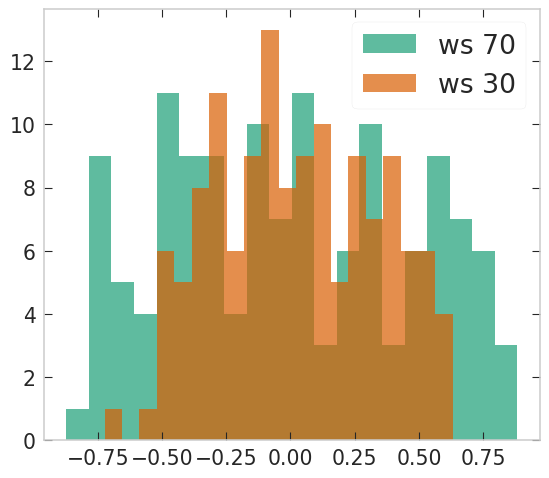

In [83]:
plt.hist(lambdas4.sel(a=0.5).taus,bins=20,alpha=0.7,label='ws 70')
plt.hist(lambdas5.sel(a=0.5).taus,bins=20,alpha=0.7,label='ws 30')
plt.legend()
plt.show()

In [ ]:
pvs4 = np.zeros((3,niter))

for i in range(3):
    data = lamss4[i]
    pvs4[i] = make_pvs_array(data,yrs[gedge:-gedge])